In [1]:
from tensorflow.python.client import device_lib   # 이는 나중에 GPU를 사용하고자 할때 필요함.
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13388985258991650241
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9894363136
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16113748669897607248
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [4]:
import pandas as pd
df = pd.read_excel("../01. 데이터/Data for headed bars_for DataFrame_220725.xlsx", skiprows = 17)
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "Ld", "fcm", "db", "b", "cos,avg",
                                 "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "Fsu at La, test", "dtr", "Ntr", "st"]) # st 제거시
df

,No.,Author,Year,Test type,Remark,Specimen,fy,Ld,fcm,db,...,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,"Fsu at La, test",dtr,Ntr,st
0,1.0,Wright,NaN,Stub-beam,NaN,1-TH01-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.47,9.395954,376.153911,0.000,0.0,12.7
1,2.0,Wright,NaN,Stub-beam,NaN,1-TH02-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.39,9.395954,388.271356,0.000,0.0,12.7
2,3.0,Wright,NaN,Stub-beam,NaN,1-TH03-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,47.12,9.395954,364.470642,0.000,0.0,12.7
3,4.0,Wright,NaN,Stub-beam,NaN,2-TH04-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,47.96,9.395954,482.092746,9.500,3.0,127.0
4,5.0,Wright,NaN,Stub-beam,NaN,2-TH05-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,50.80,9.395954,462.692993,9.500,3.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,154.94,35.724138,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,457.241379,15.875,2.0,25.4
474,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,172.72,37.655172,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,466.896552,15.875,2.0,25.4
475,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,160.02,37.655172,25.4,...,774.70,774.70,NaN,1.0,NaN,5.100000,412.413793,15.875,3.0,25.4
476,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,167.64,37.655172,25.4,...,762.00,762.00,NaN,1.0,NaN,5.100000,488.275862,15.875,3.0,25.4


In [5]:
df = df[df["Test type"] == "Joint type"]  # 실험방법이 Joint type일 경우: 성능이 크게 개선됨.

In [6]:
original_Fsu =  df["Fsu at La, test"]
#df["Fsu at La, test"] = np.log1p(df["Fsu at La, test"]) # 스케일링을 한다면 굳이 로그 함수를 사용하지 않아도 됩니다.

In [7]:
y= df["Fsu at La, test"]
y

134           NaN
135           NaN
136           NaN
137    119.721038
138           NaN
          ...    
426    837.931034
427    568.965517
428    607.586207
429    626.206897
430    675.862069
Name: Fsu at La, test, Length: 297, dtype: float64

In [8]:
df.info()   # dtr, Ntr 데이터가 상대적으로 모자라니, 이 둘을 feature에서 제거함.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 134 to 430
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              297 non-null    float64
 1   Author           297 non-null    object 
 2   Year             297 non-null    float64
 3   Test type        297 non-null    object 
 4   Remark           202 non-null    object 
 5   Specimen         297 non-null    object 
 6   fy               297 non-null    float64
 7   Ld               297 non-null    float64
 8   fcm              297 non-null    float64
 9   db               297 non-null    float64
 10  b                297 non-null    float64
 11  cos,avg          297 non-null    float64
 12  cth              297 non-null    float64
 13  ch               297 non-null    float64
 14  Nh               297 non-null    float64
 15  Bottom cover     293 non-null    float64
 16  Ah/Ab            297 non-null    float64
 17  Fsu at La, tes

In [9]:
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "dtr", "Ntr", "st"]] # 최대변수 사용
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 누락값 많은 변수 미사용
# Test type - One-hot encoding
X = df[["Test type", "fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 범주형 데이터: Test type 포함
print(X["Test type"].value_counts()) # 범주 갯수 확인
X = pd.get_dummies(data = X, columns = ["Test type"], prefix = "Test_type") # One-hot Endcoding 실행 -> (0, 0, 0, 1, 0), (1, 0, 0, 0, 0), ...
X

Joint type    297
Name: Test type, dtype: int64


,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
134,447.700000,888.000,24.200000,57.300,350.00,146.35,50.00,0.000,1.0,853.0,5.0,888.000,1
135,447.700000,684.000,24.200000,57.300,350.00,146.35,254.00,0.000,1.0,853.0,5.0,684.000,1
136,447.700000,684.000,24.200000,57.300,350.00,146.35,254.00,0.000,1.0,853.0,5.0,684.000,1
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.00,0.000,1.0,853.0,5.0,479.000,1
138,450.600000,372.000,24.600000,35.800,220.00,92.10,50.00,0.000,1.0,369.0,5.0,372.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,931.034483,485.902,43.586207,35.814,563.88,71.12,86.36,350.012,2.0,508.0,6.5,101.600,1
427,799.310345,495.300,37.448276,35.814,558.80,71.12,93.98,154.559,3.0,508.0,5.5,495.300,1
428,931.034483,489.966,43.586207,35.814,556.26,71.12,87.63,153.289,3.0,508.0,6.5,489.966,1
429,799.310345,492.252,37.448276,35.814,553.72,64.77,96.52,158.369,3.0,508.0,5.5,101.600,1


In [10]:
y2 = y[~y.isnull()]
y2

137    119.721038
141    118.787276
145    112.745098
146    312.500000
147    417.000000
          ...    
426    837.931034
427    568.965517
428    607.586207
429    626.206897
430    675.862069
Name: Fsu at La, test, Length: 274, dtype: float64

In [11]:
X = X[~y.isnull()]
X

,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.00,0.000,1.0,853.000000,5.0,479.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.00,0.000,1.0,369.000000,5.0,217.000,1
145,454.800000,161.000,25.100000,25.400,160.00,67.30,153.00,0.000,1.0,278.000000,5.0,161.000,1
146,606.000000,301.000,47.900000,43.000,541.80,43.00,56.00,369.800,2.0,138.166667,5.0,301.000,1
147,606.000000,301.000,47.900000,43.000,541.80,43.00,56.00,369.800,2.0,138.166667,5.0,370.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,931.034483,485.902,43.586207,35.814,563.88,71.12,86.36,350.012,2.0,508.000000,6.5,101.600,1
427,799.310345,495.300,37.448276,35.814,558.80,71.12,93.98,154.559,3.0,508.000000,5.5,495.300,1
428,931.034483,489.966,43.586207,35.814,556.26,71.12,87.63,153.289,3.0,508.000000,6.5,489.966,1
429,799.310345,492.252,37.448276,35.814,553.72,64.77,96.52,158.369,3.0,508.000000,5.5,101.600,1


In [12]:
# X.fillna(0, inplace = True)   # 빈 데이터를을 모두 0으로 채우는 것은 잘못된 결과를 주어서 위험합니다. 차라리 다음과 같이 데이터를 없애는 게 낫습니다.
X.dropna(inplace = True)
X

C:\Users\baekjw\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,fy,Ld,fcm,db,b,"cos,avg",cth,ch,Nh,Bottom cover,Ah/Ab,st,Test_type_Joint type
137,447.700000,479.000,24.200000,57.300,350.00,146.35,459.00,0.000,1.0,853.000000,5.0,479.000,1
141,450.600000,217.000,24.600000,35.800,220.00,92.10,205.00,0.000,1.0,369.000000,5.0,217.000,1
145,454.800000,161.000,25.100000,25.400,160.00,67.30,153.00,0.000,1.0,278.000000,5.0,161.000,1
146,606.000000,301.000,47.900000,43.000,541.80,43.00,56.00,369.800,2.0,138.166667,5.0,301.000,1
147,606.000000,301.000,47.900000,43.000,541.80,43.00,56.00,369.800,2.0,138.166667,5.0,370.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,931.034483,485.902,43.586207,35.814,563.88,71.12,86.36,350.012,2.0,508.000000,6.5,101.600,1
427,799.310345,495.300,37.448276,35.814,558.80,71.12,93.98,154.559,3.0,508.000000,5.5,495.300,1
428,931.034483,489.966,43.586207,35.814,556.26,71.12,87.63,153.289,3.0,508.000000,6.5,489.966,1
429,799.310345,492.252,37.448276,35.814,553.72,64.77,96.52,158.369,3.0,508.000000,5.5,101.600,1


In [13]:
y2 = y2[X.index] # 목표값도 X와 동일하게 indexing
y2

137    119.721038
141    118.787276
145    112.745098
146    312.500000
147    417.000000
          ...    
426    837.931034
427    568.965517
428    607.586207
429    626.206897
430    675.862069
Name: Fsu at La, test, Length: 270, dtype: float64

In [14]:
##학습과 실험 데이터를 분류하고 train과 valid 데이터를 분류한뒤

In [15]:
# Train, Valid, Test Set으로 분류

In [16]:
# 1. Train + Valid : Test  = 0.9 : 0.1 --> 먼저 9:1로 나누고

In [17]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.10, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((243, 13), (27, 13), (243,), (27,))

In [18]:
# 2. Train : Valid = 8: 2  --> 9중 20%를 valid로 가져옴

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20,random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((194, 13), (49, 13), (194,), (49,))

In [20]:
## X변수들을 MinMaxScaler로 스케일링을 진행하였습니다.
## --> Y도 스케일링 하여야 합니다.

In [21]:
print(type(X_train))
print(type(X_valid))
print(type(X_test))
print(type(y_train))
print(type(y_valid))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [22]:
from sklearn.preprocessing import MinMaxScaler

scX = MinMaxScaler()                    # X의 scaler 정의
X_train_scaled = scX.fit_transform(X_train)    
X_valid_scaled = scX.transform(X_valid)
X_test_scaled = scX.transform(X_test)

scY = MinMaxScaler()                    # y의 scaler 정의
y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)) # y_train.values.reshape(-1,1) 는 Pandas Series를 조작하여 차원조절
y_valid_scaled = scY.transform(y_valid.values.reshape(-1,1))
y_test_scaled = scY.transform(y_test.values.reshape(-1,1))

In [23]:
##층을 여기서 더 추가하거나 하여도 오히려 성능이 더 떨어지는 결과가 나옵니다.
# Set random seed
tf.random.set_seed(42)

# 1. Create a model  --> 일단 현재 네트워크 사용: 최종 네트워크는 실험을 통해 결정(성능 vs 비용 비교하여 효율적인 방향으로 설정)
model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(500, activation='relu'),
           tf.keras.layers.Dense(250, activation='relu'),
           tf.keras.layers.Dense(10, activation='relu'),
           tf.keras.layers.Dense(100, activation='relu'),
           tf.keras.layers.Dense(50, activation='sigmoid'), 
           tf.keras.layers.Dense(1)
])

# 2. Comile the model
model_1.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['MAE'])

In [24]:
# 3. Fit the model
history = model_1.fit(X_train_scaled, 
                      y_train_scaled, 
                      epochs=10000,    # Load가 크지 않은 문제이므로, 충분히 학습할 것(즉, Underfitting이 되지 않도록 할 것). 
                      verbose = 1,     # 단, Overfitting이 발생하면 더이상 학습할 필요가 없음. 
                      #validation_split = 0.1)
                      validation_data=(X_valid_scaled, y_valid_scaled))

Epoch 1/10000
7/7 [==============================] - 2s 18ms/step - loss: 0.2076 - MAE: 0.2076 - val_loss: 0.1705 - val_MAE: 0.1705
Epoch 2/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.1925 - MAE: 0.1925 - val_loss: 0.1622 - val_MAE: 0.1622
Epoch 3/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.1821 - MAE: 0.1821 - val_loss: 0.1574 - val_MAE: 0.1574
Epoch 4/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.1761 - MAE: 0.1761 - val_loss: 0.1564 - val_MAE: 0.1564
Epoch 5/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.1715 - MAE: 0.1715 - val_loss: 0.1592 - val_MAE: 0.1592
Epoch 6/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.1696 - MAE: 0.1696 - val_loss: 0.1615 - val_MAE: 0.1615
Epoch 7/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.1689 - MAE: 0.1689 - val_loss: 0.1630 - val_MAE: 0.1630
Epoch 8/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.1687 - 

7/7 [==============================] - 0s 6ms/step - loss: 0.0837 - MAE: 0.0837 - val_loss: 0.0954 - val_MAE: 0.0954
Epoch 64/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0759 - MAE: 0.0759 - val_loss: 0.0987 - val_MAE: 0.0987
Epoch 65/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0788 - MAE: 0.0788 - val_loss: 0.0951 - val_MAE: 0.0951
Epoch 66/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0757 - MAE: 0.0757 - val_loss: 0.0941 - val_MAE: 0.0941
Epoch 67/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0748 - MAE: 0.0748 - val_loss: 0.0962 - val_MAE: 0.0962
Epoch 68/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0779 - MAE: 0.0779 - val_loss: 0.0927 - val_MAE: 0.0927
Epoch 69/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0809 - MAE: 0.0809 - val_loss: 0.0944 - val_MAE: 0.0944
Epoch 70/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0750 - MAE: 0.0

Epoch 125/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0578 - MAE: 0.0578 - val_loss: 0.0789 - val_MAE: 0.0789
Epoch 126/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0585 - MAE: 0.0585 - val_loss: 0.0791 - val_MAE: 0.0791
Epoch 127/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0568 - MAE: 0.0568 - val_loss: 0.0803 - val_MAE: 0.0803
Epoch 128/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0580 - MAE: 0.0580 - val_loss: 0.0804 - val_MAE: 0.0804
Epoch 129/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0574 - MAE: 0.0574 - val_loss: 0.0805 - val_MAE: 0.0805
Epoch 130/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0567 - MAE: 0.0567 - val_loss: 0.0794 - val_MAE: 0.0794
Epoch 131/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0573 - MAE: 0.0573 - val_loss: 0.0775 - val_MAE: 0.0775
Epoch 132/10000
7/7 [==============================] - 0s 6ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0482 - MAE: 0.0482 - val_loss: 0.0717 - val_MAE: 0.0717
Epoch 187/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0487 - MAE: 0.0487 - val_loss: 0.0725 - val_MAE: 0.0725
Epoch 188/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0547 - MAE: 0.0547 - val_loss: 0.0737 - val_MAE: 0.0737
Epoch 189/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0501 - MAE: 0.0501 - val_loss: 0.0755 - val_MAE: 0.0755
Epoch 190/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0558 - MAE: 0.0558 - val_loss: 0.0724 - val_MAE: 0.0724
Epoch 191/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0578 - MAE: 0.0578 - val_loss: 0.0714 - val_MAE: 0.0714
Epoch 192/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0527 - MAE: 0.0527 - val_loss: 0.0723 - val_MAE: 0.0723
Epoch 193/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0546 - M

Epoch 248/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0456 - MAE: 0.0456 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 249/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0430 - MAE: 0.0430 - val_loss: 0.0684 - val_MAE: 0.0684
Epoch 250/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0424 - MAE: 0.0424 - val_loss: 0.0718 - val_MAE: 0.0718
Epoch 251/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0463 - MAE: 0.0463 - val_loss: 0.0715 - val_MAE: 0.0715
Epoch 252/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0425 - MAE: 0.0425 - val_loss: 0.0684 - val_MAE: 0.0684
Epoch 253/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0433 - MAE: 0.0433 - val_loss: 0.0696 - val_MAE: 0.0696
Epoch 254/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0442 - MAE: 0.0442 - val_loss: 0.0697 - val_MAE: 0.0697
Epoch 255/10000
7/7 [==============================] - 0s 7ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0435 - MAE: 0.0435 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 310/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0432 - MAE: 0.0432 - val_loss: 0.0690 - val_MAE: 0.0690
Epoch 311/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0433 - MAE: 0.0433 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 312/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0429 - MAE: 0.0429 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 313/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0409 - MAE: 0.0409 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 314/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0431 - MAE: 0.0431 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 315/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0373 - MAE: 0.0373 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 316/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0383 - M

Epoch 371/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0365 - MAE: 0.0365 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 372/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0343 - MAE: 0.0343 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 373/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0342 - MAE: 0.0342 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 374/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0336 - MAE: 0.0336 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 375/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0365 - MAE: 0.0365 - val_loss: 0.0702 - val_MAE: 0.0702
Epoch 376/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0369 - MAE: 0.0369 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 377/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0349 - MAE: 0.0349 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 378/10000
7/7 [==============================] - 0s 8ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0334 - MAE: 0.0334 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 433/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0384 - MAE: 0.0384 - val_loss: 0.0706 - val_MAE: 0.0706
Epoch 434/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0352 - MAE: 0.0352 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 435/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0323 - MAE: 0.0323 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 436/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0355 - MAE: 0.0355 - val_loss: 0.0695 - val_MAE: 0.0695
Epoch 437/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0331 - MAE: 0.0331 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 438/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0319 - MAE: 0.0319 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 439/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0341 - M

Epoch 494/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0298 - MAE: 0.0298 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 495/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0289 - MAE: 0.0289 - val_loss: 0.0686 - val_MAE: 0.0686
Epoch 496/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0299 - MAE: 0.0299 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 497/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0300 - MAE: 0.0300 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 498/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0322 - MAE: 0.0322 - val_loss: 0.0720 - val_MAE: 0.0720
Epoch 499/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0330 - MAE: 0.0330 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 500/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0326 - MAE: 0.0326 - val_loss: 0.0706 - val_MAE: 0.0706
Epoch 501/10000
7/7 [==============================] - 0s 7ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0283 - MAE: 0.0283 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 556/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0264 - MAE: 0.0264 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 557/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0296 - MAE: 0.0296 - val_loss: 0.0716 - val_MAE: 0.0716
Epoch 558/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0289 - MAE: 0.0289 - val_loss: 0.0630 - val_MAE: 0.0630
Epoch 559/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0313 - MAE: 0.0313 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 560/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0303 - MAE: 0.0303 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 561/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0280 - MAE: 0.0280 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 562/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0268 - M

Epoch 617/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0241 - MAE: 0.0241 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 618/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0248 - MAE: 0.0248 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 619/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0246 - MAE: 0.0246 - val_loss: 0.0621 - val_MAE: 0.0621
Epoch 620/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0281 - MAE: 0.0281 - val_loss: 0.0765 - val_MAE: 0.0765
Epoch 621/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0364 - MAE: 0.0364 - val_loss: 0.0617 - val_MAE: 0.0617
Epoch 622/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0258 - MAE: 0.0258 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 623/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0269 - MAE: 0.0269 - val_loss: 0.0629 - val_MAE: 0.0629
Epoch 624/10000
7/7 [==============================] - 0s 7ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0256 - MAE: 0.0256 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 679/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0258 - MAE: 0.0258 - val_loss: 0.0684 - val_MAE: 0.0684
Epoch 680/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0244 - MAE: 0.0244 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 681/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0236 - MAE: 0.0236 - val_loss: 0.0709 - val_MAE: 0.0709
Epoch 682/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0284 - MAE: 0.0284 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 683/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0266 - MAE: 0.0266 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 684/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0230 - MAE: 0.0230 - val_loss: 0.0629 - val_MAE: 0.0629
Epoch 685/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0255 - M

Epoch 740/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0228 - MAE: 0.0228 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 741/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0217 - MAE: 0.0217 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 742/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0228 - MAE: 0.0228 - val_loss: 0.0609 - val_MAE: 0.0609
Epoch 743/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0265 - MAE: 0.0265 - val_loss: 0.0683 - val_MAE: 0.0683
Epoch 744/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0240 - MAE: 0.0240 - val_loss: 0.0724 - val_MAE: 0.0724
Epoch 745/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0281 - MAE: 0.0281 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 746/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0364 - MAE: 0.0364 - val_loss: 0.0708 - val_MAE: 0.0708
Epoch 747/10000
7/7 [==============================] - 0s 7ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0225 - MAE: 0.0225 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 802/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0204 - MAE: 0.0204 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 803/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0210 - MAE: 0.0210 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 804/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0205 - MAE: 0.0205 - val_loss: 0.0695 - val_MAE: 0.0695
Epoch 805/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0238 - MAE: 0.0238 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 806/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0244 - MAE: 0.0244 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 807/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0221 - MAE: 0.0221 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 808/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0222 - M

Epoch 863/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0215 - MAE: 0.0215 - val_loss: 0.0744 - val_MAE: 0.0744
Epoch 864/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0270 - MAE: 0.0270 - val_loss: 0.0602 - val_MAE: 0.0602
Epoch 865/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0252 - MAE: 0.0252 - val_loss: 0.0688 - val_MAE: 0.0688
Epoch 866/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0236 - MAE: 0.0236 - val_loss: 0.0694 - val_MAE: 0.0694
Epoch 867/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0265 - MAE: 0.0265 - val_loss: 0.0616 - val_MAE: 0.0616
Epoch 868/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0218 - MAE: 0.0218 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 869/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0230 - MAE: 0.0230 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 870/10000
7/7 [==============================] - 0s 7ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0198 - MAE: 0.0198 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 925/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0200 - MAE: 0.0200 - val_loss: 0.0678 - val_MAE: 0.0678
Epoch 926/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0210 - MAE: 0.0210 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 927/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0219 - MAE: 0.0219 - val_loss: 0.0704 - val_MAE: 0.0704
Epoch 928/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0228 - MAE: 0.0228 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 929/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0203 - MAE: 0.0203 - val_loss: 0.0596 - val_MAE: 0.0596
Epoch 930/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0196 - MAE: 0.0196 - val_loss: 0.0621 - val_MAE: 0.0621
Epoch 931/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.0181 - 

Epoch 986/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0188 - MAE: 0.0188 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 987/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0230 - MAE: 0.0230 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 988/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0256 - MAE: 0.0256 - val_loss: 0.0629 - val_MAE: 0.0629
Epoch 989/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0207 - MAE: 0.0207 - val_loss: 0.0690 - val_MAE: 0.0690
Epoch 990/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0238 - MAE: 0.0238 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 991/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0230 - MAE: 0.0230 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 992/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0201 - MAE: 0.0201 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 993/10000
7/7 [==============================] - 0s 8ms/step - 

7/7 [==============================] - 0s 7ms/step - loss: 0.0181 - MAE: 0.0181 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 1048/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0184 - MAE: 0.0184 - val_loss: 0.0695 - val_MAE: 0.0695
Epoch 1049/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0262 - MAE: 0.0262 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 1050/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0286 - MAE: 0.0286 - val_loss: 0.0742 - val_MAE: 0.0742
Epoch 1051/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0270 - MAE: 0.0270 - val_loss: 0.0591 - val_MAE: 0.0591
Epoch 1052/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0233 - MAE: 0.0233 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 1053/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0226 - MAE: 0.0226 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 1054/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0175 - MAE: 0.0175 - val_loss: 0.0615 - val_MAE: 0.0615
Epoch 1109/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0198 - MAE: 0.0198 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 1110/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0212 - MAE: 0.0212 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 1111/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0228 - MAE: 0.0228 - val_loss: 0.0604 - val_MAE: 0.0604
Epoch 1112/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0279 - MAE: 0.0279 - val_loss: 0.0708 - val_MAE: 0.0708
Epoch 1113/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0203 - MAE: 0.0203 - val_loss: 0.0605 - val_MAE: 0.0605
Epoch 1114/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0223 - MAE: 0.0223 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 1115/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0215 - MAE: 0.0215 - val_loss: 0.0607 - val_MAE: 0.0607
Epoch 1170/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0193 - MAE: 0.0193 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 1171/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0175 - MAE: 0.0175 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 1172/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0181 - MAE: 0.0181 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 1173/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 1174/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0169 - MAE: 0.0169 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 1175/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0212 - MAE: 0.0212 - val_loss: 0.0609 - val_MAE: 0.0609
Epoch 1176/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0193 - MAE: 0.0193 - val_loss: 0.0605 - val_MAE: 0.0605
Epoch 1231/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.0170 - MAE: 0.0170 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 1232/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0160 - MAE: 0.0160 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 1233/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0163 - MAE: 0.0163 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 1234/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0180 - MAE: 0.0180 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 1235/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0196 - MAE: 0.0196 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 1236/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0191 - MAE: 0.0191 - val_loss: 0.0720 - val_MAE: 0.0720
Epoch 1237/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.

7/7 [==============================] - 0s 7ms/step - loss: 0.0164 - MAE: 0.0164 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 1292/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0166 - MAE: 0.0166 - val_loss: 0.0627 - val_MAE: 0.0627
Epoch 1293/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0196 - MAE: 0.0196 - val_loss: 0.0678 - val_MAE: 0.0678
Epoch 1294/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0190 - MAE: 0.0190 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 1295/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0167 - MAE: 0.0167 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 1296/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0187 - MAE: 0.0187 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 1297/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0194 - MAE: 0.0194 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 1298/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0157 - MAE: 0.0157 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 1353/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 1354/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0166 - MAE: 0.0166 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 1355/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0188 - MAE: 0.0188 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 1356/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0197 - MAE: 0.0197 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 1357/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0189 - MAE: 0.0189 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 1358/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0185 - MAE: 0.0185 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 1359/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0174 - MAE: 0.0174 - val_loss: 0.0678 - val_MAE: 0.0678
Epoch 1414/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0186 - MAE: 0.0186 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 1415/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0181 - MAE: 0.0181 - val_loss: 0.0602 - val_MAE: 0.0602
Epoch 1416/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0174 - MAE: 0.0174 - val_loss: 0.0604 - val_MAE: 0.0604
Epoch 1417/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0171 - MAE: 0.0171 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 1418/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0175 - MAE: 0.0175 - val_loss: 0.0703 - val_MAE: 0.0703
Epoch 1419/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0216 - MAE: 0.0216 - val_loss: 0.0615 - val_MAE: 0.0615
Epoch 1420/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0160 - MAE: 0.0160 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 1475/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 1476/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0165 - MAE: 0.0165 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 1477/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 1478/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0153 - MAE: 0.0153 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 1479/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0149 - MAE: 0.0149 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 1480/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0149 - MAE: 0.0149 - val_loss: 0.0622 - val_MAE: 0.0622
Epoch 1481/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0216 - MAE: 0.0216 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 1536/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0199 - MAE: 0.0199 - val_loss: 0.0695 - val_MAE: 0.0695
Epoch 1537/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0188 - MAE: 0.0188 - val_loss: 0.0715 - val_MAE: 0.0715
Epoch 1538/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0258 - MAE: 0.0258 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 1539/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0226 - MAE: 0.0226 - val_loss: 0.0702 - val_MAE: 0.0702
Epoch 1540/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0175 - MAE: 0.0175 - val_loss: 0.0687 - val_MAE: 0.0687
Epoch 1541/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0214 - MAE: 0.0214 - val_loss: 0.0614 - val_MAE: 0.0614
Epoch 1542/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0178 - MAE: 0.0178 - val_loss: 0.0696 - val_MAE: 0.0696
Epoch 1597/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0247 - MAE: 0.0247 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 1598/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0204 - MAE: 0.0204 - val_loss: 0.0685 - val_MAE: 0.0685
Epoch 1599/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0181 - MAE: 0.0181 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 1600/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0155 - MAE: 0.0155 - val_loss: 0.0618 - val_MAE: 0.0618
Epoch 1601/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0205 - MAE: 0.0205 - val_loss: 0.0715 - val_MAE: 0.0715
Epoch 1602/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0191 - MAE: 0.0191 - val_loss: 0.0615 - val_MAE: 0.0615
Epoch 1603/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0144 - MAE: 0.0144 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 1658/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0683 - val_MAE: 0.0683
Epoch 1659/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0184 - MAE: 0.0184 - val_loss: 0.0616 - val_MAE: 0.0616
Epoch 1660/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.0171 - MAE: 0.0171 - val_loss: 0.0609 - val_MAE: 0.0609
Epoch 1661/10000
7/7 [==============================] - 0s 12ms/step - loss: 0.0161 - MAE: 0.0161 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 1662/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0160 - MAE: 0.0160 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 1663/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0143 - MAE: 0.0143 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 1664/10000
7/7 [==============================] - 0s 6ms/step - loss: 0

7/7 [==============================] - 0s 13ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 1719/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0168 - MAE: 0.0168 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 1720/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0185 - MAE: 0.0185 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 1721/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0169 - MAE: 0.0169 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 1722/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0157 - MAE: 0.0157 - val_loss: 0.0616 - val_MAE: 0.0616
Epoch 1723/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0144 - MAE: 0.0144 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 1724/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0134 - MAE: 0.0134 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 1725/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.

7/7 [==============================] - 0s 6ms/step - loss: 0.0148 - MAE: 0.0148 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 1780/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0150 - MAE: 0.0150 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 1781/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0155 - MAE: 0.0155 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 1782/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0183 - MAE: 0.0183 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 1783/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0170 - MAE: 0.0170 - val_loss: 0.0619 - val_MAE: 0.0619
Epoch 1784/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0140 - MAE: 0.0140 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 1785/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0142 - MAE: 0.0142 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 1786/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0179 - MAE: 0.0179 - val_loss: 0.0605 - val_MAE: 0.0605
Epoch 1841/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0267 - MAE: 0.0267 - val_loss: 0.0713 - val_MAE: 0.0713
Epoch 1842/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0226 - MAE: 0.0226 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 1843/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0195 - MAE: 0.0195 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 1844/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0159 - MAE: 0.0159 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 1845/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0603 - val_MAE: 0.0603
Epoch 1846/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0168 - MAE: 0.0168 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 1847/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0132 - MAE: 0.0132 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 1902/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 1903/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0148 - MAE: 0.0148 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 1904/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0153 - MAE: 0.0153 - val_loss: 0.0621 - val_MAE: 0.0621
Epoch 1905/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0134 - MAE: 0.0134 - val_loss: 0.0610 - val_MAE: 0.0610
Epoch 1906/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0168 - MAE: 0.0168 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 1907/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - MAE: 0.0168 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 1908/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 1963/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0164 - MAE: 0.0164 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 1964/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 1965/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0136 - MAE: 0.0136 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 1966/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0612 - val_MAE: 0.0612
Epoch 1967/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0597 - val_MAE: 0.0597
Epoch 1968/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0139 - MAE: 0.0139 - val_loss: 0.0600 - val_MAE: 0.0600
Epoch 1969/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0177 - MAE: 0.0177 - val_loss: 0.0621 - val_MAE: 0.0621
Epoch 2024/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 2025/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - MAE: 0.0123 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 2026/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0145 - MAE: 0.0145 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 2027/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - MAE: 0.0140 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 2028/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0132 - MAE: 0.0132 - val_loss: 0.0619 - val_MAE: 0.0619
Epoch 2029/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0136 - MAE: 0.0136 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 2030/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0148 - MAE: 0.0148 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 2085/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0145 - MAE: 0.0145 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 2086/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0142 - MAE: 0.0142 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 2087/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0616 - val_MAE: 0.0616
Epoch 2088/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0149 - MAE: 0.0149 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 2089/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - MAE: 0.0136 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 2090/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - MAE: 0.0140 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 2091/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0149 - MAE: 0.0149 - val_loss: 0.0617 - val_MAE: 0.0617
Epoch 2146/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 2147/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - MAE: 0.0168 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 2148/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0159 - MAE: 0.0159 - val_loss: 0.0621 - val_MAE: 0.0621
Epoch 2149/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0142 - MAE: 0.0142 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 2150/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0119 - MAE: 0.0119 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 2151/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 2152/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0121 - MAE: 0.0121 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 2207/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 2208/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 2209/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0139 - MAE: 0.0139 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 2210/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0170 - MAE: 0.0170 - val_loss: 0.0620 - val_MAE: 0.0620
Epoch 2211/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 2212/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0174 - MAE: 0.0174 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 2213/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0120 - MAE: 0.0120 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 2268/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0118 - MAE: 0.0118 - val_loss: 0.0615 - val_MAE: 0.0615
Epoch 2269/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - MAE: 0.0127 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 2270/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 2271/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0183 - MAE: 0.0183 - val_loss: 0.0602 - val_MAE: 0.0602
Epoch 2272/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0205 - MAE: 0.0205 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 2273/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0164 - MAE: 0.0164 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 2274/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0150 - MAE: 0.0150 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 2329/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0137 - MAE: 0.0137 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 2330/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0117 - MAE: 0.0117 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 2331/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 2332/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0145 - MAE: 0.0145 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 2333/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0154 - MAE: 0.0154 - val_loss: 0.0630 - val_MAE: 0.0630
Epoch 2334/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0175 - MAE: 0.0175 - val_loss: 0.0696 - val_MAE: 0.0696
Epoch 2335/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0187 - MAE: 0.0187 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 2390/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0162 - MAE: 0.0162 - val_loss: 0.0624 - val_MAE: 0.0624
Epoch 2391/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0176 - MAE: 0.0176 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 2392/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 2393/10000
7/7 [==============================] - 0s 11ms/step - loss: 0.0133 - MAE: 0.0133 - val_loss: 0.0613 - val_MAE: 0.0613
Epoch 2394/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0145 - MAE: 0.0145 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 2395/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0157 - MAE: 0.0157 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 2396/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.

7/7 [==============================] - 0s 8ms/step - loss: 0.0139 - MAE: 0.0139 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 2451/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - MAE: 0.0168 - val_loss: 0.0605 - val_MAE: 0.0605
Epoch 2452/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0162 - MAE: 0.0162 - val_loss: 0.0620 - val_MAE: 0.0620
Epoch 2453/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0142 - MAE: 0.0142 - val_loss: 0.0689 - val_MAE: 0.0689
Epoch 2454/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0207 - MAE: 0.0207 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 2455/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0184 - MAE: 0.0184 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 2456/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0152 - MAE: 0.0152 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 2457/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0127 - MAE: 0.0127 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 2512/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 2513/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0119 - MAE: 0.0119 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 2514/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - MAE: 0.0137 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 2515/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - MAE: 0.0140 - val_loss: 0.0615 - val_MAE: 0.0615
Epoch 2516/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0145 - MAE: 0.0145 - val_loss: 0.0619 - val_MAE: 0.0619
Epoch 2517/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.0160 - MAE: 0.0160 - val_loss: 0.0704 - val_MAE: 0.0704
Epoch 2518/10000
7/7 [==============================] - 0s 10ms/step - loss: 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0133 - MAE: 0.0133 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 2573/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0150 - MAE: 0.0150 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 2574/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - MAE: 0.0136 - val_loss: 0.0678 - val_MAE: 0.0678
Epoch 2575/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0148 - MAE: 0.0148 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 2576/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - MAE: 0.0140 - val_loss: 0.0627 - val_MAE: 0.0627
Epoch 2577/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0630 - val_MAE: 0.0630
Epoch 2578/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 2579/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0139 - MAE: 0.0139 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 2634/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0134 - MAE: 0.0134 - val_loss: 0.0694 - val_MAE: 0.0694
Epoch 2635/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0209 - MAE: 0.0209 - val_loss: 0.0618 - val_MAE: 0.0618
Epoch 2636/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0184 - MAE: 0.0184 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 2637/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0178 - MAE: 0.0178 - val_loss: 0.0684 - val_MAE: 0.0684
Epoch 2638/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0141 - MAE: 0.0141 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 2639/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 2640/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 2695/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - MAE: 0.0122 - val_loss: 0.0625 - val_MAE: 0.0625
Epoch 2696/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 2697/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0617 - val_MAE: 0.0617
Epoch 2698/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 2699/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 2700/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 2701/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0141 - MAE: 0.0141 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 2756/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - MAE: 0.0127 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 2757/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 2758/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 2759/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0117 - MAE: 0.0117 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 2760/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 2761/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0118 - MAE: 0.0118 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 2762/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0134 - MAE: 0.0134 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 2817/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0140 - MAE: 0.0140 - val_loss: 0.0623 - val_MAE: 0.0623
Epoch 2818/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0132 - MAE: 0.0132 - val_loss: 0.0615 - val_MAE: 0.0615
Epoch 2819/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0141 - MAE: 0.0141 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 2820/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0148 - MAE: 0.0148 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 2821/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0141 - MAE: 0.0141 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 2822/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0627 - val_MAE: 0.0627
Epoch 2823/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0168 - MAE: 0.0168 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 2878/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0131 - MAE: 0.0131 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 2879/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0115 - MAE: 0.0115 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 2880/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0117 - MAE: 0.0117 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 2881/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0121 - MAE: 0.0121 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 2882/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - MAE: 0.0137 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 2883/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - MAE: 0.0123 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 2884/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 2939/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0114 - MAE: 0.0114 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 2940/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 2941/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0108 - MAE: 0.0108 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 2942/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0110 - MAE: 0.0110 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 2943/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 2944/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 2945/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 3000/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 3001/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 3002/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0118 - MAE: 0.0118 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 3003/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 3004/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 3005/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0163 - MAE: 0.0163 - val_loss: 0.0616 - val_MAE: 0.0616
Epoch 3006/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0110 - MAE: 0.0110 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 3061/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 3062/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0624 - val_MAE: 0.0624
Epoch 3063/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0606 - val_MAE: 0.0606
Epoch 3064/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0127 - MAE: 0.0127 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 3065/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0145 - MAE: 0.0145 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 3066/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 3067/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 3122/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0118 - MAE: 0.0118 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 3123/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 3124/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 3125/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - MAE: 0.0137 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 3126/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 3127/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 3128/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0121 - MAE: 0.0121 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 3183/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0618 - val_MAE: 0.0618
Epoch 3184/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 3185/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 3186/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0119 - MAE: 0.0119 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 3187/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0120 - MAE: 0.0120 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 3188/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - MAE: 0.0123 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 3189/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - MAE: 0.0123 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 3244/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0130 - MAE: 0.0130 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 3245/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0682 - val_MAE: 0.0682
Epoch 3246/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0174 - MAE: 0.0174 - val_loss: 0.0601 - val_MAE: 0.0601
Epoch 3247/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0162 - MAE: 0.0162 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 3248/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0680 - val_MAE: 0.0680
Epoch 3249/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0114 - MAE: 0.0114 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 3250/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0618 - val_MAE: 0.0618
Epoch 3305/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0162 - MAE: 0.0162 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 3306/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 3307/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - MAE: 0.0123 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 3308/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0625 - val_MAE: 0.0625
Epoch 3309/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0624 - val_MAE: 0.0624
Epoch 3310/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 3311/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 3366/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 3367/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0122 - MAE: 0.0122 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 3368/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0110 - MAE: 0.0110 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 3369/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 3370/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 3371/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0142 - MAE: 0.0142 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 3372/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0141 - MAE: 0.0141 - val_loss: 0.0698 - val_MAE: 0.0698
Epoch 3427/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0154 - MAE: 0.0154 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 3428/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 3429/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0115 - MAE: 0.0115 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 3430/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 3431/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0131 - MAE: 0.0131 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 3432/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0600 - val_MAE: 0.0600
Epoch 3433/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0097 - MAE: 0.0097 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 3488/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0133 - MAE: 0.0133 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 3489/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0115 - MAE: 0.0115 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 3490/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 3491/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0630 - val_MAE: 0.0630
Epoch 3492/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0618 - val_MAE: 0.0618
Epoch 3493/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0158 - MAE: 0.0158 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 3494/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0679 - val_MAE: 0.0679
Epoch 3549/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0164 - MAE: 0.0164 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 3550/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0150 - MAE: 0.0150 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 3551/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0110 - MAE: 0.0110 - val_loss: 0.0697 - val_MAE: 0.0697
Epoch 3552/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0172 - MAE: 0.0172 - val_loss: 0.0617 - val_MAE: 0.0617
Epoch 3553/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0620 - val_MAE: 0.0620
Epoch 3554/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0133 - MAE: 0.0133 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 3555/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0110 - MAE: 0.0110 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 3610/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 3611/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 3612/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0133 - MAE: 0.0133 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 3613/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0117 - MAE: 0.0117 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 3614/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 3615/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 3616/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - MAE: 0.0123 - val_loss: 0.0627 - val_MAE: 0.0627
Epoch 3671/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0630 - val_MAE: 0.0630
Epoch 3672/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0118 - MAE: 0.0118 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 3673/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 3674/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 3675/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 3676/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 3677/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 3732/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0625 - val_MAE: 0.0625
Epoch 3733/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0099 - MAE: 0.0099 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 3734/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 3735/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 3736/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0109 - MAE: 0.0109 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 3737/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0620 - val_MAE: 0.0620
Epoch 3738/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0152 - MAE: 0.0152 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 3793/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 3794/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0117 - MAE: 0.0117 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 3795/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 3796/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0097 - MAE: 0.0097 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 3797/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 3798/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 3799/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0115 - MAE: 0.0115 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 3854/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 3855/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 3856/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 3857/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0099 - MAE: 0.0099 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 3858/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 3859/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 3860/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0627 - val_MAE: 0.0627
Epoch 3915/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 3916/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 3917/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0118 - MAE: 0.0118 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 3918/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.0113 - MAE: 0.0113 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 3919/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0097 - MAE: 0.0097 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 3920/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 3921/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.

7/7 [==============================] - 0s 8ms/step - loss: 0.0162 - MAE: 0.0162 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 3976/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0139 - MAE: 0.0139 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 3977/10000
7/7 [==============================] - 0s 16ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 3978/10000
7/7 [==============================] - 0s 12ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 3979/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0097 - MAE: 0.0097 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 3980/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 3981/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 3982/10000
7/7 [==============================] - 0s 6ms/step - loss: 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 4037/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 4038/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 4039/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0108 - MAE: 0.0108 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 4040/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 4041/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 4042/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 4043/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 5ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 4098/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0109 - MAE: 0.0109 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 4099/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 4100/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 4101/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 4102/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0130 - MAE: 0.0130 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 4103/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0115 - MAE: 0.0115 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 4104/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 4159/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0137 - MAE: 0.0137 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 4160/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 4161/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 4162/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 4163/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 4164/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0120 - MAE: 0.0120 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 4165/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 4220/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 4221/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0113 - MAE: 0.0113 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 4222/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 4223/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0114 - MAE: 0.0114 - val_loss: 0.0690 - val_MAE: 0.0690
Epoch 4224/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0151 - MAE: 0.0151 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 4225/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0143 - MAE: 0.0143 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 4226/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 4281/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0099 - MAE: 0.0099 - val_loss: 0.0618 - val_MAE: 0.0618
Epoch 4282/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 4283/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0118 - MAE: 0.0118 - val_loss: 0.0701 - val_MAE: 0.0701
Epoch 4284/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0178 - MAE: 0.0178 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 4285/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 4286/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 4287/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 4342/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 4343/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 4344/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 4345/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 4346/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 4347/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 4348/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 4403/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 4404/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 4405/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 4406/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0631 - val_MAE: 0.0631
Epoch 4407/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0169 - MAE: 0.0169 - val_loss: 0.0689 - val_MAE: 0.0689
Epoch 4408/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0136 - MAE: 0.0136 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 4409/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 4464/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 4465/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 4466/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 4467/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 4468/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 4469/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 4470/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 4525/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0132 - MAE: 0.0132 - val_loss: 0.0620 - val_MAE: 0.0620
Epoch 4526/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0135 - MAE: 0.0135 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 4527/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0123 - MAE: 0.0123 - val_loss: 0.0677 - val_MAE: 0.0677
Epoch 4528/10000
7/7 [==============================] - 0s 9ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0686 - val_MAE: 0.0686
Epoch 4529/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 4530/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 4531/10000
7/7 [==============================] - 0s 8ms/step - loss: 0

7/7 [==============================] - 0s 6ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 4586/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 4587/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 4588/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 4589/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 4590/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 4591/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 4592/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 4647/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 4648/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 4649/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 4650/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0680 - val_MAE: 0.0680
Epoch 4651/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 4652/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 4653/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 4708/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 4709/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 4710/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 4711/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 4712/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 4713/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 4714/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 4769/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 4770/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 4771/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 4772/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 4773/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 4774/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 4775/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0091 - MAE: 0.0091 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 4830/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 4831/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0681 - val_MAE: 0.0681
Epoch 4832/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0108 - MAE: 0.0108 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 4833/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0091 - MAE: 0.0091 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 4834/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0687 - val_MAE: 0.0687
Epoch 4835/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 4836/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0115 - MAE: 0.0115 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 4891/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 4892/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 4893/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0673 - val_MAE: 0.0673
Epoch 4894/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 4895/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 4896/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 4897/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 4952/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 4953/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 4954/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 4955/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 4956/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0120 - MAE: 0.0120 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 4957/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0133 - MAE: 0.0133 - val_loss: 0.0605 - val_MAE: 0.0605
Epoch 4958/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 5013/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 5014/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 5015/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 5016/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 5017/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 5018/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 5019/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0091 - MAE: 0.0091 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 5074/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0091 - MAE: 0.0091 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 5075/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0146 - MAE: 0.0146 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 5076/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - MAE: 0.0127 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 5077/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 5078/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 5079/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 5080/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 5135/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0629 - val_MAE: 0.0629
Epoch 5136/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0138 - MAE: 0.0138 - val_loss: 0.0627 - val_MAE: 0.0627
Epoch 5137/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0134 - MAE: 0.0134 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 5138/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 5139/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 5140/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 5141/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0121 - MAE: 0.0121 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 5196/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 5197/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0625 - val_MAE: 0.0625
Epoch 5198/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 5199/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 5200/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0621 - val_MAE: 0.0621
Epoch 5201/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0114 - MAE: 0.0114 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 5202/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 5257/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0132 - MAE: 0.0132 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 5258/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0683 - val_MAE: 0.0683
Epoch 5259/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0114 - MAE: 0.0114 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 5260/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0126 - MAE: 0.0126 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 5261/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0109 - MAE: 0.0109 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 5262/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 5263/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 5318/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0117 - MAE: 0.0117 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 5319/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0113 - MAE: 0.0113 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 5320/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0684 - val_MAE: 0.0684
Epoch 5321/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0127 - MAE: 0.0127 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 5322/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0112 - MAE: 0.0112 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 5323/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 5324/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 5379/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 5380/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 5381/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0617 - val_MAE: 0.0617
Epoch 5382/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 5383/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 5384/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 5385/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5440/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 5441/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0099 - MAE: 0.0099 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5442/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 5443/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 5444/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 5445/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 5446/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 5501/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 5502/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 5503/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 5504/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0113 - MAE: 0.0113 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 5505/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 5506/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0133 - MAE: 0.0133 - val_loss: 0.0629 - val_MAE: 0.0629
Epoch 5507/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5562/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 5563/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 5564/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0632 - val_MAE: 0.0632
Epoch 5565/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0629 - val_MAE: 0.0629
Epoch 5566/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 5567/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 5568/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0097 - MAE: 0.0097 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 5623/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 5624/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 5625/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5626/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0673 - val_MAE: 0.0673
Epoch 5627/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0110 - MAE: 0.0110 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 5628/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5629/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0678 - val_MAE: 0.0678
Epoch 5684/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0091 - MAE: 0.0091 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 5685/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 5686/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0091 - MAE: 0.0091 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 5687/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 5688/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 5689/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 5690/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 5745/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 5746/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 5747/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 5748/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0677 - val_MAE: 0.0677
Epoch 5749/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 5750/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 5751/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 5806/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 5807/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 5808/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 5809/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5810/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 5811/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0108 - MAE: 0.0108 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 5812/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 5867/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 5868/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 5869/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 5870/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 5871/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 5872/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5873/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 5928/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 5929/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5930/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 5931/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 5932/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 5933/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 5934/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0091 - MAE: 0.0091 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 5989/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 5990/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 5991/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 5992/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 5993/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 5994/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 5995/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 6050/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 6051/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 6052/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6053/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 6054/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 6055/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 6056/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 6111/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 6112/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0114 - MAE: 0.0114 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 6113/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 6114/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 6115/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 6116/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 6117/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0156 - MAE: 0.0156 - val_loss: 0.0679 - val_MAE: 0.0679
Epoch 6172/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0125 - MAE: 0.0125 - val_loss: 0.0617 - val_MAE: 0.0617
Epoch 6173/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0108 - MAE: 0.0108 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 6174/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 6175/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 6176/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 6177/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 6178/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6233/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 6234/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 6235/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 6236/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 6237/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 6238/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 6239/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 6294/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 6295/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 6296/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 6297/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 6298/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6299/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 6300/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 6355/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 6356/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0627 - val_MAE: 0.0627
Epoch 6357/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0629 - val_MAE: 0.0629
Epoch 6358/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 6359/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 6360/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 6361/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 6416/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 6417/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 6418/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 6419/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 6420/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 6421/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 6422/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 6477/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0113 - MAE: 0.0113 - val_loss: 0.0678 - val_MAE: 0.0678
Epoch 6478/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0129 - MAE: 0.0129 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 6479/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0131 - MAE: 0.0131 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 6480/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 6481/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 6482/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0120 - MAE: 0.0120 - val_loss: 0.0685 - val_MAE: 0.0685
Epoch 6483/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 6538/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 6539/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 6540/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 6541/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 6542/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 6543/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 6544/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 6599/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 6600/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 6601/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 6602/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0680 - val_MAE: 0.0680
Epoch 6603/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6604/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 6605/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0116 - MAE: 0.0116 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 6660/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 6661/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - MAE: 0.0103 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 6662/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 6663/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 6664/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 6665/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0673 - val_MAE: 0.0673
Epoch 6666/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 6721/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 6722/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 6723/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6724/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 6725/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 6726/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 6727/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6782/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 6783/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0614 - val_MAE: 0.0614
Epoch 6784/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 6785/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 6786/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 6787/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 6788/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 6843/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 6844/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 6845/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 6846/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 6847/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 6848/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6849/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 6904/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 6905/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0055 - MAE: 0.0055 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 6906/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 6907/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 6908/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 6909/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 6910/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 6965/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 6966/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 6967/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 6968/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 6969/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 6970/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 6971/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 7026/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 7027/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 7028/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0062 - MAE: 0.0062 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 7029/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 7030/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 7031/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 7032/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 7087/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 7088/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 7089/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0673 - val_MAE: 0.0673
Epoch 7090/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 7091/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 7092/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 7093/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 7148/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 7149/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 7150/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0097 - MAE: 0.0097 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 7151/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0134 - MAE: 0.0134 - val_loss: 0.0623 - val_MAE: 0.0623
Epoch 7152/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0113 - MAE: 0.0113 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7153/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 7154/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 7209/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 7210/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 7211/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 7212/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 7213/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 7214/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0084 - MAE: 0.0084 - val_loss: 0.0619 - val_MAE: 0.0619
Epoch 7215/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0150 - MAE: 0.0150 - val_loss: 0.0624 - val_MAE: 0.0624
Epoch 7270/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0098 - MAE: 0.0098 - val_loss: 0.0620 - val_MAE: 0.0620
Epoch 7271/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0102 - MAE: 0.0102 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 7272/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 7273/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 7274/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0104 - MAE: 0.0104 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 7275/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 7276/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0166 - MAE: 0.0166 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 7331/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 7332/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 7333/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 7334/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 7335/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 7336/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 7337/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 7392/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7393/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 7394/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 7395/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 7396/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0097 - MAE: 0.0097 - val_loss: 0.0673 - val_MAE: 0.0673
Epoch 7397/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 7398/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0099 - MAE: 0.0099 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 7453/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0099 - MAE: 0.0099 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 7454/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 7455/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 7456/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 7457/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0630 - val_MAE: 0.0630
Epoch 7458/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0626 - val_MAE: 0.0626
Epoch 7459/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 7514/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 7515/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 7516/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 7517/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0634 - val_MAE: 0.0634
Epoch 7518/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 7519/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 7520/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 7575/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 7576/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7577/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 7578/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 7579/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 7580/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 7581/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 7636/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 7637/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 7638/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 7639/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 7640/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 7641/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7642/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 7697/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 7698/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7699/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 7700/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 7701/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0124 - MAE: 0.0124 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 7702/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0128 - MAE: 0.0128 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 7703/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7758/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 7759/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 7760/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 7761/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 7762/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 7763/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 7764/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 7819/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 7820/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 7821/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 7822/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0677 - val_MAE: 0.0677
Epoch 7823/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0095 - MAE: 0.0095 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7824/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 7825/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 7880/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 7881/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 7882/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 7883/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 7884/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 7885/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 7886/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 7941/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 7942/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 7943/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 7944/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 7945/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 7946/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 7947/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 8002/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 8003/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 8004/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 8005/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8006/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 8007/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 8008/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 8063/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 8064/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 8065/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 8066/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 8067/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 8068/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 8069/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0689 - val_MAE: 0.0689
Epoch 8124/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 8125/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 8126/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8127/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0673 - val_MAE: 0.0673
Epoch 8128/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 8129/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0637 - val_MAE: 0.0637
Epoch 8130/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 8185/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 8186/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8187/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 8188/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 8189/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 8190/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 8191/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 8246/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0086 - MAE: 0.0086 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 8247/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 8248/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 8249/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 8250/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0062 - MAE: 0.0062 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8251/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8252/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 8307/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0701 - val_MAE: 0.0701
Epoch 8308/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0176 - MAE: 0.0176 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 8309/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0111 - MAE: 0.0111 - val_loss: 0.0702 - val_MAE: 0.0702
Epoch 8310/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0113 - MAE: 0.0113 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 8311/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0087 - MAE: 0.0087 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 8312/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0683 - val_MAE: 0.0683
Epoch 8313/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0058 - MAE: 0.0058 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 8368/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0056 - MAE: 0.0056 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8369/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 8370/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 8371/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 8372/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 8373/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0062 - MAE: 0.0062 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 8374/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 8429/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0101 - MAE: 0.0101 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 8430/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 8431/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 8432/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0680 - val_MAE: 0.0680
Epoch 8433/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 8434/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0621 - val_MAE: 0.0621
Epoch 8435/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 8490/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 8491/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0677 - val_MAE: 0.0677
Epoch 8492/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 8493/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0630 - val_MAE: 0.0630
Epoch 8494/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 8495/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0674 - val_MAE: 0.0674
Epoch 8496/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 8551/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 8552/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 8553/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 8554/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 8555/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0645 - val_MAE: 0.0645
Epoch 8556/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 8557/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 8612/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 8613/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 8614/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 8615/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 8616/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 8617/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 8618/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0633 - val_MAE: 0.0633
Epoch 8673/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 8674/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 8675/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 8676/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 8677/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 8678/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0053 - MAE: 0.0053 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 8679/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 8734/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 8735/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 8736/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 8737/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 8738/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 8739/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0686 - val_MAE: 0.0686
Epoch 8740/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0055 - MAE: 0.0055 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 8795/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 8796/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 8797/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 8798/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 8799/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0062 - MAE: 0.0062 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 8800/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 8801/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 8856/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 8857/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 8858/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0105 - MAE: 0.0105 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 8859/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0094 - MAE: 0.0094 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 8860/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 8861/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - MAE: 0.0089 - val_loss: 0.0681 - val_MAE: 0.0681
Epoch 8862/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 6ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 8917/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 8918/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 8919/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0054 - MAE: 0.0054 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 8920/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0051 - MAE: 0.0051 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 8921/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 8922/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 8923/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8978/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 8979/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0052 - MAE: 0.0052 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 8980/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0054 - MAE: 0.0054 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 8981/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0050 - MAE: 0.0050 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 8982/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0054 - MAE: 0.0054 - val_loss: 0.0648 - val_MAE: 0.0648
Epoch 8983/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0058 - MAE: 0.0058 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 8984/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 9039/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 9040/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 9041/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 9042/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0085 - MAE: 0.0085 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 9043/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 9044/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 9045/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0056 - MAE: 0.0056 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 9100/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0057 - MAE: 0.0057 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 9101/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 9102/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0052 - MAE: 0.0052 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 9103/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0658 - val_MAE: 0.0658
Epoch 9104/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0053 - MAE: 0.0053 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 9105/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 9106/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 9161/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 9162/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 9163/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 9164/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 9165/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 9166/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0672 - val_MAE: 0.0672
Epoch 9167/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0070 - MAE: 0.0070 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 9222/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0675 - val_MAE: 0.0675
Epoch 9223/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 9224/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0057 - MAE: 0.0057 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 9225/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0049 - MAE: 0.0049 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 9226/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0661 - val_MAE: 0.0661
Epoch 9227/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0054 - MAE: 0.0054 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 9228/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 9283/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0071 - MAE: 0.0071 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 9284/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0682 - val_MAE: 0.0682
Epoch 9285/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0068 - MAE: 0.0068 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 9286/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0048 - MAE: 0.0048 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 9287/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0063 - MAE: 0.0063 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 9288/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0057 - MAE: 0.0057 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 9289/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0055 - MAE: 0.0055 - val_loss: 0.0676 - val_MAE: 0.0676
Epoch 9344/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 9345/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0659 - val_MAE: 0.0659
Epoch 9346/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0666 - val_MAE: 0.0666
Epoch 9347/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0079 - MAE: 0.0079 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 9348/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 9349/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0083 - MAE: 0.0083 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 9350/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 9405/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0640 - val_MAE: 0.0640
Epoch 9406/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 9407/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0053 - MAE: 0.0053 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 9408/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 9409/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0100 - MAE: 0.0100 - val_loss: 0.0670 - val_MAE: 0.0670
Epoch 9410/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0106 - MAE: 0.0106 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 9411/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 9466/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0638 - val_MAE: 0.0638
Epoch 9467/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 9468/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 9469/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 9470/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0069 - MAE: 0.0069 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 9471/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 9472/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 8ms/step - loss: 0.0055 - MAE: 0.0055 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 9527/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0055 - MAE: 0.0055 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 9528/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0062 - MAE: 0.0062 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 9529/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - MAE: 0.0082 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 9530/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 9531/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0078 - MAE: 0.0078 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 9532/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 9533/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0643 - val_MAE: 0.0643
Epoch 9588/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0067 - MAE: 0.0067 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 9589/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0056 - MAE: 0.0056 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 9590/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0056 - MAE: 0.0056 - val_loss: 0.0657 - val_MAE: 0.0657
Epoch 9591/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 9592/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0660 - val_MAE: 0.0660
Epoch 9593/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 9594/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0080 - MAE: 0.0080 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 9649/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0065 - MAE: 0.0065 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 9650/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0062 - MAE: 0.0062 - val_loss: 0.0664 - val_MAE: 0.0664
Epoch 9651/10000
7/7 [==============================] - 0s 8ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0646 - val_MAE: 0.0646
Epoch 9652/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 9653/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0647 - val_MAE: 0.0647
Epoch 9654/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 9655/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - MAE: 0.0081 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 9710/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 9711/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0073 - MAE: 0.0073 - val_loss: 0.0671 - val_MAE: 0.0671
Epoch 9712/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 9713/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0092 - MAE: 0.0092 - val_loss: 0.0680 - val_MAE: 0.0680
Epoch 9714/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0687 - val_MAE: 0.0687
Epoch 9715/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0088 - MAE: 0.0088 - val_loss: 0.0667 - val_MAE: 0.0667
Epoch 9716/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - MAE: 0.0096 - val_loss: 0.0641 - val_MAE: 0.0641
Epoch 9771/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0074 - MAE: 0.0074 - val_loss: 0.0668 - val_MAE: 0.0668
Epoch 9772/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0665 - val_MAE: 0.0665
Epoch 9773/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0062 - MAE: 0.0062 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 9774/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0057 - MAE: 0.0057 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 9775/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0076 - MAE: 0.0076 - val_loss: 0.0635 - val_MAE: 0.0635
Epoch 9776/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0107 - MAE: 0.0107 - val_loss: 0.0686 - val_MAE: 0.0686
Epoch 9777/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - MAE: 0.0072 - val_loss: 0.0663 - val_MAE: 0.0663
Epoch 9832/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0057 - MAE: 0.0057 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 9833/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0056 - MAE: 0.0056 - val_loss: 0.0653 - val_MAE: 0.0653
Epoch 9834/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0066 - MAE: 0.0066 - val_loss: 0.0662 - val_MAE: 0.0662
Epoch 9835/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0090 - MAE: 0.0090 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 9836/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 9837/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0075 - MAE: 0.0075 - val_loss: 0.0655 - val_MAE: 0.0655
Epoch 9838/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0

7/7 [==============================] - 0s 7ms/step - loss: 0.0060 - MAE: 0.0060 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 9893/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0093 - MAE: 0.0093 - val_loss: 0.0677 - val_MAE: 0.0677
Epoch 9894/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - MAE: 0.0077 - val_loss: 0.0651 - val_MAE: 0.0651
Epoch 9895/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0064 - MAE: 0.0064 - val_loss: 0.0644 - val_MAE: 0.0644
Epoch 9896/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0056 - MAE: 0.0056 - val_loss: 0.0669 - val_MAE: 0.0669
Epoch 9897/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0652 - val_MAE: 0.0652
Epoch 9898/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 9899/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0

7/7 [==============================] - 0s 5ms/step - loss: 0.0061 - MAE: 0.0061 - val_loss: 0.0650 - val_MAE: 0.0650
Epoch 9954/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0048 - MAE: 0.0048 - val_loss: 0.0656 - val_MAE: 0.0656
Epoch 9955/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.0050 - MAE: 0.0050 - val_loss: 0.0642 - val_MAE: 0.0642
Epoch 9956/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0054 - MAE: 0.0054 - val_loss: 0.0654 - val_MAE: 0.0654
Epoch 9957/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0058 - MAE: 0.0058 - val_loss: 0.0636 - val_MAE: 0.0636
Epoch 9958/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0059 - MAE: 0.0059 - val_loss: 0.0639 - val_MAE: 0.0639
Epoch 9959/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0051 - MAE: 0.0051 - val_loss: 0.0649 - val_MAE: 0.0649
Epoch 9960/10000
7/7 [==============================] - 0s 5ms/step - loss: 0.0

Text(0.5, 0, 'epochs')

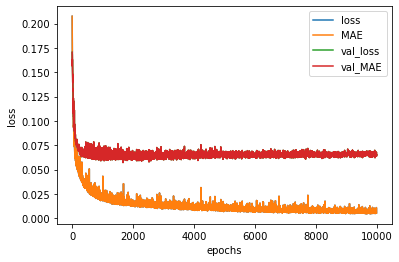

In [25]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [26]:
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "epochs.jpg")

<Figure size 432x288 with 0 Axes>

### Prediciton

In [27]:
y_p = model_1.predict(X_test_scaled)

1/1 [==============================] - 0s 49ms/step


In [28]:
y_p[:10], y_test_scaled[:10]

(array([[0.75118613],
        [0.560258  ],
        [0.7454747 ],
        [0.4510587 ],
        [0.39136913],
        [0.45535758],
        [0.80482256],
        [0.6426258 ],
        [0.8708935 ],
        [0.3758075 ]], dtype=float32),
 array([[0.76728813],
        [0.65214751],
        [0.76377719],
        [0.43681026],
        [0.33958441],
        [0.45913619],
        [0.78610313],
        [0.635187  ],
        [0.98703655],
        [0.28989119]]))

In [29]:
y_test_unscaled = scY.inverse_transform(y_test_scaled)  # scaler.inverse_transform(): scaling을 환원(unscaling)
print(y_test_unscaled)
y_p_unscaled = scY.inverse_transform(y_p)
print(y_p_unscaled)

[[ 847.5       ]
 [ 737.24137931]
 [ 844.13793103]
 [ 531.03448276]
 [ 437.93103448]
 [ 552.4137931 ]
 [ 865.51724138]
 [ 721.        ]
 [1057.93103448]
 [ 390.34482759]
 [ 280.        ]
 [ 626.20689655]
 [ 437.93103448]
 [ 647.5862069 ]
 [ 560.        ]
 [ 544.82758621]
 [ 350.34482759]
 [ 600.        ]
 [ 573.79310345]
 [ 354.66005857]
 [ 513.79310345]
 [ 568.96551724]
 [ 724.        ]
 [ 707.        ]
 [ 327.5862069 ]
 [ 475.        ]
 [ 445.        ]]
[[832.08075]
 [649.248  ]
 [826.61145]
 [544.6788 ]
 [487.52008]
 [548.7954 ]
 [883.44293]
 [728.1234 ]
 [946.71246]
 [472.61826]
 [245.82724]
 [592.4502 ]
 [367.51685]
 [695.99854]
 [685.2853 ]
 [485.46057]
 [390.3877 ]
 [503.56775]
 [585.3301 ]
 [310.3494 ]
 [592.2629 ]
 [556.60785]
 [723.6881 ]
 [705.5528 ]
 [315.04544]
 [513.3673 ]
 [402.21326]]


In [30]:
# from keras.models import load_model
# model_1 = load_model('modelsave/Model7251545file.h5')

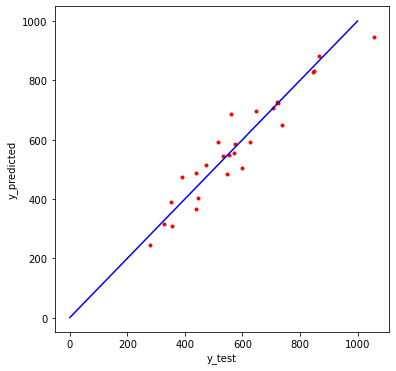

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(y_test_unscaled, y_p_unscaled, 'r.')
ax.set_xlabel("y_test")
ax.set_ylabel("y_predicted")
x = np.linspace(0, 1000, 100)
y = x
ax.plot(x, y, 'b')
#ax.set_xlim([y_p_unscaled.min(), y_p_unscaled.max()])
#ax.set_ylim([y_test_unscaled.min(), y_test_unscaled.max()])

### 기존식들과의 비교평가

In [ ]:
ANN_model = y_p_unscaled/y_test_unscaled
ACI_model = 





In [32]:
# 그림의 저장
from datetime import datetime
now = datetime.now()
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "comparison.jpg")

<Figure size 432x288 with 0 Axes>

In [33]:
X_test_unscaled = scX.inverse_transform(X_test_scaled)  # scaler.inverse_transform(): scaling을 환원(unscaling)
print(X_test_unscaled)

[[661.          88.8        225.5         22.2        366.
   22.2         29.2        277.2          2.          59.2
    5.          88.8          1.        ]
 [799.31034483 277.876       40.68965517  25.4        447.04
   62.23        85.09       271.78         2.         260.35
    7.5         76.2          1.        ]
 [827.5862069  241.3         40.75862069  25.4        482.6
   99.06        82.55       233.68         2.         260.35
    5.         101.6          1.        ]
 [827.5862069  363.22        38.4137931   25.4        439.42
   63.5         86.36        70.27333333   4.         260.35
   10.5        363.22         1.        ]
 [958.62068966  96.774       33.17241379  15.875      330.2
   63.5        135.89       171.45         2.         133.35
    5.          88.9          1.        ]
 [827.5862069  139.7        110.55172414  25.4        429.26
   62.23       119.38       254.           2.         260.35
    5.          76.2          1.        ]
 [958.62068966 107.18

In [34]:
score = model_1.evaluate(X_test_scaled, y_test_scaled)
print("test loss, test MAE:", score)

1/1 [==============================] - 0s 15ms/step - loss: 0.0447 - MAE: 0.0447
test loss, test MAE: [0.04472387209534645, 0.04472387209534645]


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test_unscaled, y_p_unscaled)

0.910009378182743

In [36]:
division = y_p_unscaled/y_test_unscaled
cov = np.std(division) / np.mean(division)
print(cov)

0.1042846256319954


In [37]:
# 모델의 저장
from datetime import datetime
now = datetime.now()
model_1.save("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "file.h5")
plt.savefig("modelsave/Model"+ str(now.month) + str(now.day) + str(now.hour) + str(now.minute)+ "file.jpg")

<Figure size 432x288 with 0 Axes>